In [1]:
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import seaborn as sns

In [2]:
notebook_dir = Path().resolve()
DATA_DIR = notebook_dir.parents[1].joinpath("data")
DATASET_DIR = DATA_DIR.joinpath("atmaCup#18_dataset")
TR_FEATURES_CSV = DATASET_DIR.joinpath("train_features.csv")
TS_FEATURES_CSV = DATASET_DIR.joinpath("test_features.csv")
IMAGES_DIR = DATASET_DIR.joinpath("images")
TRAFFIC_LIGHTS_CSV = DATASET_DIR.joinpath("traffic_lights.csv")

In [3]:
tr_df = pl.read_csv(TR_FEATURES_CSV)
tr_df

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""00066be8e20318869c38c66be46663…",5.701526,1.538456,-2.165777,-139.0,0.0,false,0.25,true,"""drive""",false,false,2.82959,0.032226,0.045187,6.231999,0.065895,0.107974,9.785009,0.124972,0.203649,13.485472,0.163448,0.302818,17.574227,0.174289,0.406331,21.951269,0.199503,0.485079
"""00066be8e20318869c38c66be46663…",11.176292,0.279881,-11.625697,-44.0,0.0,false,0.0,false,"""drive""",false,true,4.970268,-0.007936,0.005028,10.350489,-0.032374,-0.020701,15.770054,0.084073,0.008645,21.132415,0.391343,0.036335,26.316489,0.843124,0.065,31.383814,1.42507,0.073083
"""00066be8e20318869c38c66be46663…",10.472548,0.231099,-2.985105,-132.0,0.0,false,0.18,true,"""drive""",false,false,4.815701,-0.000813,0.017577,10.153522,-0.0278,0.026165,15.446539,-0.155987,0.040397,20.61816,-0.356932,0.058765,25.677387,-0.576985,0.102859,30.460033,-0.841894,0.152889
"""000fb056f97572d384bae4f5fc1e0f…",6.055565,-0.117775,7.632668,173.0,0.0,false,0.0,false,"""drive""",false,false,2.812608,0.033731,0.0059,5.975378,0.137848,0.01621,9.186793,0.322997,0.031626,12.37311,0.603145,0.031858,15.703514,0.960717,0.043479,19.311182,1.374655,0.058754
"""000fb056f97572d384bae4f5fc1e0f…",3.316744,1.276733,-31.725477,-114.0,0.0,false,0.255,true,"""drive""",false,false,1.55186,-0.041849,-0.008847,3.675162,-0.125189,-0.013725,6.113567,-0.239161,-0.012887,8.770783,-0.381813,-0.003898,11.619313,-0.554488,0.011393,14.657048,-0.7788,0.044243
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""fff88cca5f8a012427b96bdde66011…",-0.0,-0.0,16.102747,-1.0,0.0,true,0.0,false,"""drive""",false,true,0.00514,0.002648,-0.006207,0.013328,0.005834,-0.016368,0.019618,0.007763,-0.023074,0.028672,0.010737,-0.033795,0.0342,0.012502,-0.040583,0.043196,0.015644,-0.051309
"""fff88cca5f8a012427b96bdde66011…",1.594968,0.350129,-5.791823,-97.0,0.0,false,0.0,false,"""drive""",false,true,0.663311,-0.002493,-0.009528,1.516447,-0.004223,-0.020431,2.425366,-0.002958,-0.023108,3.319161,-0.012259,-0.027327,4.106655,-0.023314,-0.024449,4.708509,-0.027916,-0.026821
"""fff88cca5f8a012427b96bdde66011…",-0.004207,-0.037833,-2.089301,0.0,0.0,true,0.0,false,"""drive""",false,true,0.022788,0.000622,-0.006612,0.046445,0.001039,-0.017674,0.062182,0.000714,-0.024352,0.079601,0.000491,-0.034149,0.091362,-0.000041,-0.039632,0.10623,-0.001123,-0.04789


In [4]:
ts_df = pl.read_csv(TS_FEATURES_CSV)
ts_df

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool
"""012baccc145d400c896cb82065a93d…",3.374273,-0.01936,-34.008415,17.0,0.0,false,0.0,false,"""drive""",false,false
"""012baccc145d400c896cb82065a93d…",2.441048,-0.022754,307.860077,295.0,0.0,true,0.0,false,"""drive""",false,false
"""012baccc145d400c896cb82065a93d…",3.604152,-0.286239,10.774388,-110.0,0.0,true,0.0,false,"""drive""",false,false
"""012baccc145d400c896cb82065a93d…",2.048902,-0.537628,61.045235,189.0,0.0,true,0.0,false,"""drive""",true,false
"""01d738e799d260a10f6324f78023b3…",2.201528,-1.8986,5.740093,-41.0,0.0,true,0.0,false,"""drive""",false,false
…,…,…,…,…,…,…,…,…,…,…,…
"""ff4f00a76fbf4db0cb15579c7c6086…",14.528915,0.553588,1.450901,119.0,0.0,false,0.025,true,"""drive""",false,false
"""ff4f00a76fbf4db0cb15579c7c6086…",15.489772,0.311154,-1.327874,-124.0,0.0,false,0.355,true,"""drive""",false,false
"""ff4f00a76fbf4db0cb15579c7c6086…",16.470867,-0.021787,-1.826507,-105.0,0.0,false,0.22,true,"""drive""",false,false


In [5]:
def load_images(image_dir: Path, ids: list) -> np.ndarray:
    """
    画像を読み込む

    Args:
        image_dir (Path): 画像が格納されているディレクトリ
        ids (list): 画像のIDのリスト

    Returns:
        np.ndarray: 画像の配列(shape: (id, image_type, height, width, channel))
    """
    image_names = [
        "image_t.png",
        "image_t-0.5.png",
        "image_t-1.0.png",
    ]

    images = []
    for id in ids:
        images.append([])
        for image_name in image_names:
            image_path = image_dir.joinpath(f"{id}/{image_name}")
            image = cv2.imread(str(image_path))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images[-1].append(image)

    images = np.array(images)
    return images


In [6]:
from concurrent.futures import ThreadPoolExecutor


def load_images(image_dir: Path, ids: list) -> np.ndarray:
    """
    画像を読み込む

    Args:
        image_dir (Path): 画像が格納されているディレクトリ
        ids (list): 画像のIDのリスト

    Returns:
        np.ndarray: 画像の配列(shape: (id, image_type, height, width, channel))
    """
    image_names = [
        "image_t.png",
        "image_t-0.5.png",
        "image_t-1.0.png",
    ]

    def read_images_for_id(id):
        images_for_id = []
        for image_name in image_names:
            image_path = image_dir.joinpath(f"{id}/{image_name}")
            image = cv2.imread(str(image_path))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images_for_id.append(image)
        return images_for_id

    with ThreadPoolExecutor() as executor:
        images = list(executor.map(read_images_for_id, ids))

    images = np.array(images)
    return images

In [7]:
tr_images = load_images(IMAGES_DIR, tr_df.get_column("ID").to_list())

In [8]:
ts_images = load_images(IMAGES_DIR, ts_df.get_column("ID").to_list())

In [9]:
print(tr_images.shape)
print(ts_images.shape)

(43371, 3, 64, 128, 3)
(1727, 3, 64, 128, 3)


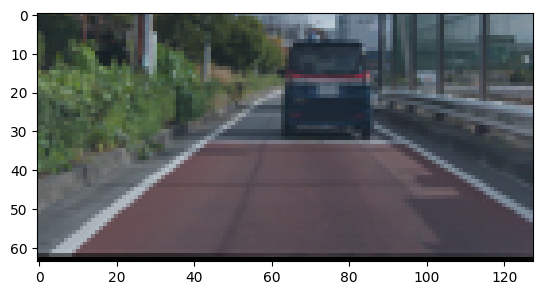

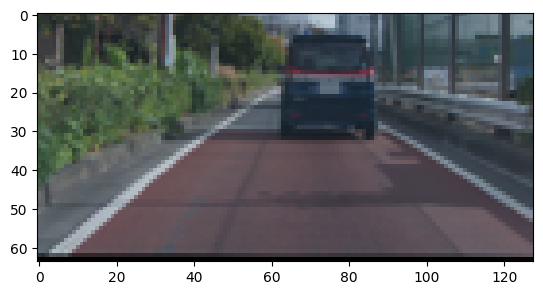

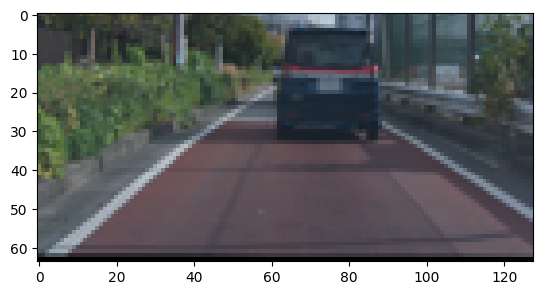

In [10]:
plt.imshow(tr_images[0][0])
plt.show()

plt.imshow(tr_images[0][1])
plt.show()

plt.imshow(tr_images[0][2])
plt.show()


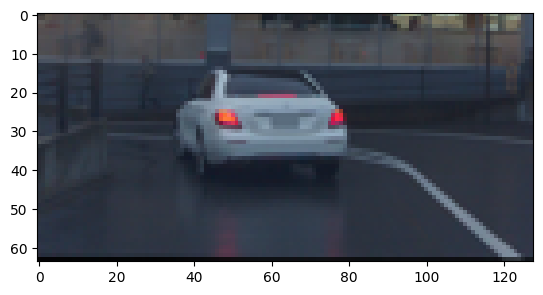

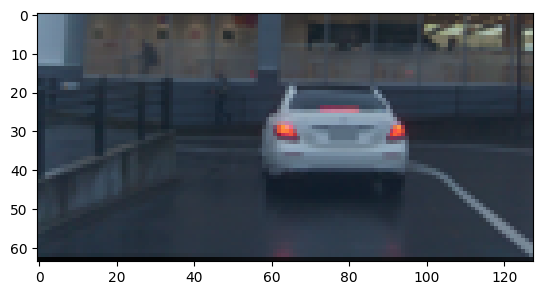

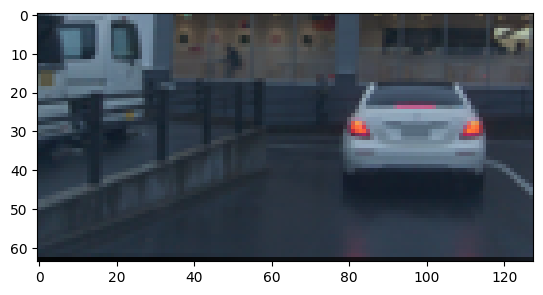

In [11]:
plt.imshow(ts_images[0][0])
plt.show()

plt.imshow(ts_images[0][1])
plt.show()

plt.imshow(ts_images[0][2])
plt.show()
